## EE 242 Lab 2b – Convolution - Denoising audio signals and images

Caitie DeShazo-Couchot

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, simpleaudio/librosa, and matplotlib.pyplot.  

In [ ]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt

#Used for Assignment 3
from scipy.io import wavfile as wav
from scipy import ndimage
import IPython
from IPython.display import Audio

#Used for Assignment 4
import skimage
from skimage import color

# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week lab.  You should plan on completing the first 2 assignments in the first week.

## Lab 2b turn in checklist

•	Lab 2b Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF** (You may also use : https://www.vertopal.com/  suggested by a student)




## Assignment 3 -- Removing Noise from an Audio Signal

In this assignment, we’ll artificially add noise to an audio signal and then apply the system you used in Assignment 2 to remove it. You will need the audio packages that you used in Lab 1. This assignment will have three parts, A-C

**A.** Read in the trombone sound file provided and name it tr_orig.  This is a mono signal, so we will only need to worry about the single channel. Create a noise sequence that is the length of tr_orig using the numpy.random.randn() noise generation function with a scaling factor of 100. (It needs to be larger to be audible given the range of tr_orig.) Then add the two signals to create tr_noisy.  Save tr_noisy to a new wav file.

**B.**  Apply the convolution filter from Assignment 2 to remove the noise from tr_noisy, creating a signal called tr_filt. Save this signal as a wav file.

**C.** Read in both the noisy and filtered versions using simpleaudio and play the two files and the original to hear the effect of the noise and noise removal. 

In [7]:
# Assignment 3 - Code goes here

#A: Read sound file
fsl, tr_orig = wav.read("trombo.wav")

#Scaling factor of 100 used to create random noise.
random_noise = 100 * (np.random.randn(len(tr_orig)))

#Add two signals to create a noisy signal.
tr_noisy = tr_orig + random_noise

#Write to wav file
wav.write("noisy.wav", fsl, tr_noisy.astype("int16"))

#B: Use convolution to filter noisy sound
time = np.linspace(0,2,2000)
hfilt = np.ones(len(time))/3
filtered_signal = np.convolve(tr_noisy, hfilt)
wav.write("filtered.wav", fsl, filtered_signal.astype("int16"))

#C: Plays all versions of the sound file.
IPython.display.Audio("trombo.wav")


In [3]:
IPython.display.Audio("noisy.wav")

In [4]:
IPython.display.Audio("filtered.wav")

###  Discussion

Comment on the differences in how the original and noise-removed signals sound. Comment on the impact of large increases or decreases in the value of k. 

## Assignment 4 -- Convolution with Images

This assignment is meant to introduce you to convolution of signals in higher dimensions. A canonical example of a 2D signal is an image. With a time signal, the impulse response has a single independent variable (time), so a discrete-time convolution has a sum over that variable. With a 2-D image, the impulse response is 2-D, so the convolution involves a double sum. Be sure to import the scipy ndimage and skimage color packages. This assignment will have four parts, A-D. Put part A (a function you will define) in its own cell and the other parts together in a separate cell. Be sure to provide a title for all the images you are plotting in each part.

**A.**  Write a function that takes an image as input and runs the Sobel edge detector (described in the background document) and returns 3 images: the horizontal edges, the vertical edges and the combined result.   

**B.**  Start a new cell and read in the image of a dragonfly provided, and convert it to grayscale. Note that the variable ‘image’ will have normalized 8-bit (0 - 1) pixel brightness values. Run the edge detector function on the dragonfly image and display the original with the 3 
outputs in a 2 by 2 figure.

**C.**  Define a 10x10 kernel where all elements have value 0.01. This impulse response is giving an average over the 10x10 window, and it should have a smoothing effect on the image, similar to the moving window for the time signal.  Convolve the image with this filter using ndimage.convolve(). Plot the original and the smoothed image side by side.  You should notice that smoothing blurs the image a little.

**D.** Run the edge detector function on the smoothed dragonfly image and plot the result side-by-side with the result from the edge detector on the original image.



In [8]:
#A. Takes image and returns horizontal edges, vertical edges, and combined using Sobel edge detector

#PRE: Takes and image as input.
#POST:Returns 3 images of the horizontal edges, vertical edges, and combined result.
def sobel_edge_detector(image):
    h = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    v = h.T
    
    h_edge = ndimage.convolve(image, h) #Processes horizontal edges.
    v_edge = ndimage.convolve(image, v) #Processes vertical edges.
    combined = np.sqrt(np.power(h_edge, 2) + np.power(v_edge, 2)) #Pythagorean Theorem
    
    return h_edge, v_edge, combined

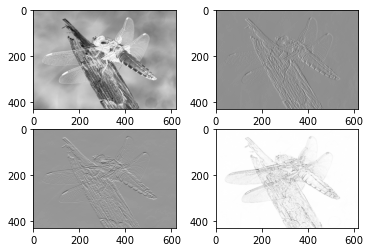

In [19]:
#B. Read image and convert to grayscale.

image_input = "dragonfly.jpg"

#PRE: Takes an image as input and reads through Sobel Edge Detector.
#POST:Returns grayscaled images of horizontal edges, vertical edges, and combined.
def read_sed(image_input):
    grey_image = color.rgb2gray(plt.imread(image_input))
    h_edge, v_edge, combined = sobel_edge_detector(grey_image)
    return grey_image, h_edge, v_edge, combined
    
%matplotlib inline
fig, axarr = plt.subplots(2,2)
axarr[0,0].imshow(grey_image, cmap = 'Greys')
axarr[0,1].imshow(h_edge, cmap = 'Greys')
axarr[1,0].imshow(v_edge, cmap = 'Greys')
axarr[1,1].imshow(combined, cmap = 'Greys')


In [20]:
#C & D. Compare Images 

#PRE: Takes in two images as input to compare.
#POST:Processes a compare and contrast of the two images and returns this fig.
def compare_images(image1, image2):
    fig = plt.figure(2, figsize=(8,8))
    plt.subplot(2,2,1)
    plt.imshow(image1, cmap='Greys')
    plt.subplot(2,2,2)
    plt.imshow(image2, cmap='Greys')

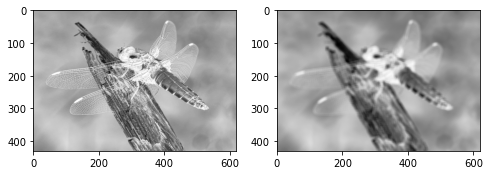

In [21]:
#C. 

kernal_10 = np.full((10,10), 0.01) #10x10 kernal with 0.01

smoothed_dragonfly = ndimage.convolve(grey_image, kernal_10)
compare_images(grey_image, smoothed_dragonfly)


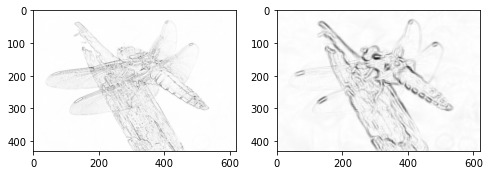

In [22]:
#D. Run Edge Detected on Smoothed Image

h_edge_s, v_edge_s, combined_s = sobel_edge_detector(smoothed_dragonfly)
compare_images(combined, combined_s)

###  Discussion

Describe the differences in the results using the edge detector on the original vs. smoothed image. Comment on how the results change if you use a larger size smoothing filter.

The smoothed images had more blurred and soft appearing images with bolder lines. The larger the filter, the more blurred and obscure the image became with lines appearing sporadically. The reverse occurs for shrinking